In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("NIFTY 500-07-04-2024-to-07-04-2025.csv")

In [ ]:
df

In [ ]:
df.head()

In [ ]:
df.sample(5)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Date             248 non-null    object 
 1   Open             248 non-null    float64
 2   High             248 non-null    float64
 3   Low              248 non-null    float64
 4   Close            248 non-null    float64
 5   Shares Traded    248 non-null    int64  
 6   Turnover (₹ Cr)  248 non-null    float64
dtypes: float64(5), int64(1), object(1)
memory usage: 13.7+ KB


In [ ]:
df.describe()

In [ ]:
df.isnull().sum()

In [27]:
df.dtypes

Date                object
Open               float64
High               float64
Low                float64
Close              float64
Shares Traded        int64
Turnover (₹ Cr)    float64
dtype: object

In [39]:
df.duplicated().sum()

0

In [43]:
df.nunique()

Date               248
Open               248
High               248
Low                248
Close              247
Shares Traded      248
Turnover (₹ Cr)    248
dtype: int64

In [ ]:
Data Visulization


In [ ]:
df.columns = df.columns.str.strip()


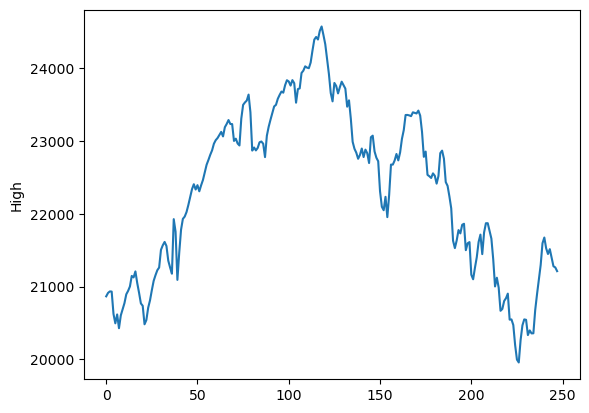

In [53]:
sns.lineplot(df["High"])
plt.show()

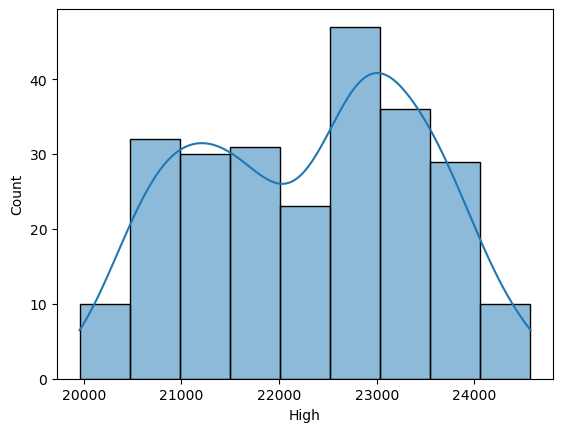

In [57]:
sns.histplot(df["High"], kde=True)
plt.show()

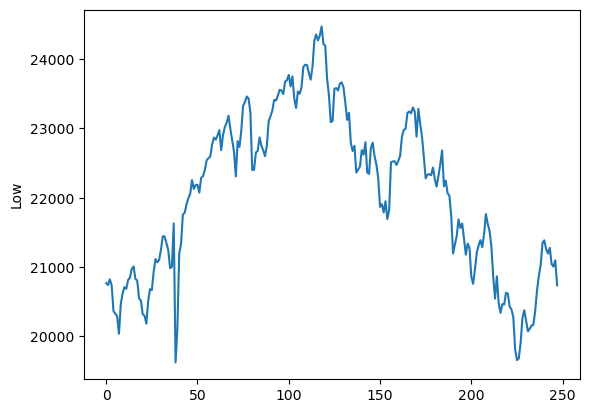

In [61]:
sns.lineplot(df["Low"])
plt.show()

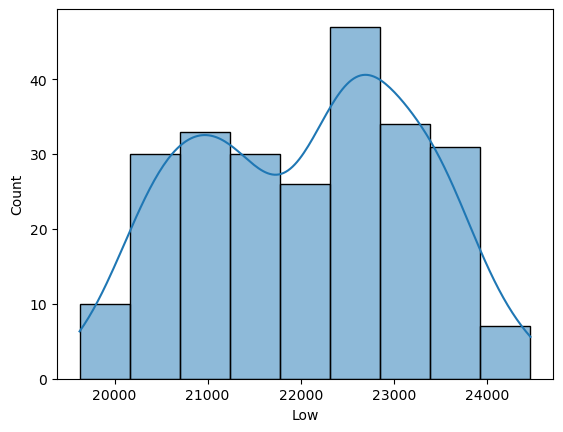

In [65]:
sns.histplot(df["Low"], kde=True)
plt.show()

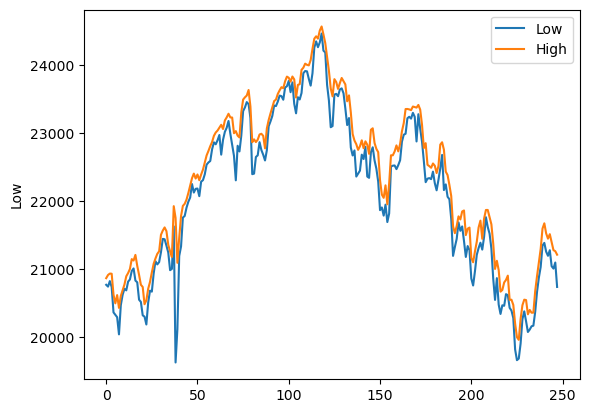

In [69]:
sns.lineplot(df["Low"], label="Low")
sns.lineplot(df["High"], label="High")
plt.legend()
plt.show()

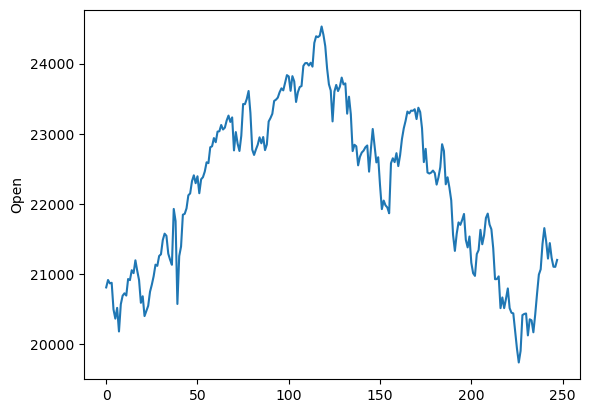

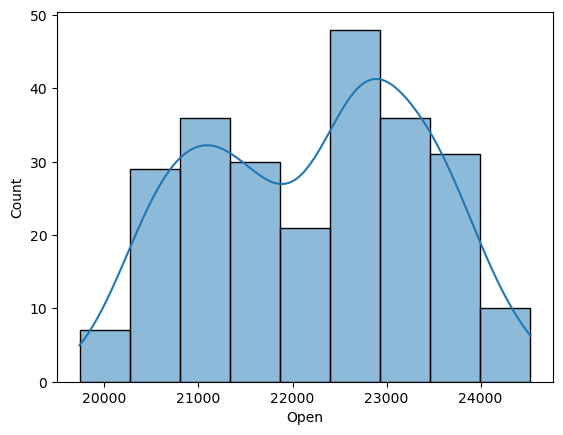

In [79]:
sns.lineplot(df["Open"])
plt.show()

sns.histplot(df["Open"], kde=True)
plt.show()

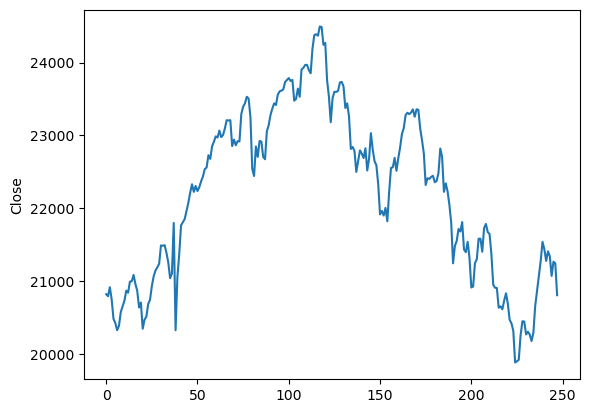

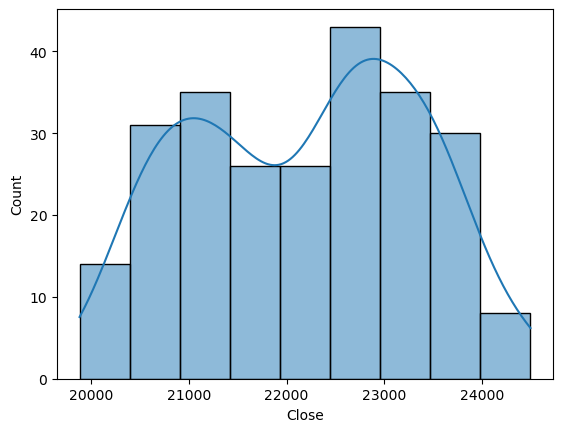

In [87]:
sns.lineplot(df["Close"])
plt.show()

sns.histplot(df["Close"], kde=True)
plt.show()

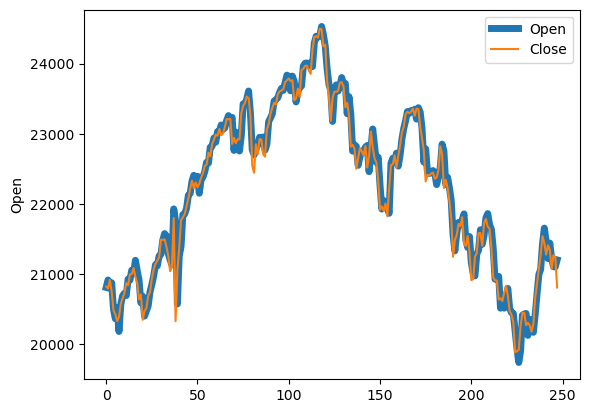

In [97]:
sns.lineplot(df["Open"], linewidth=5, label="Open")
sns.lineplot(df["Close"], label="Close")
plt.legend()
plt.show()

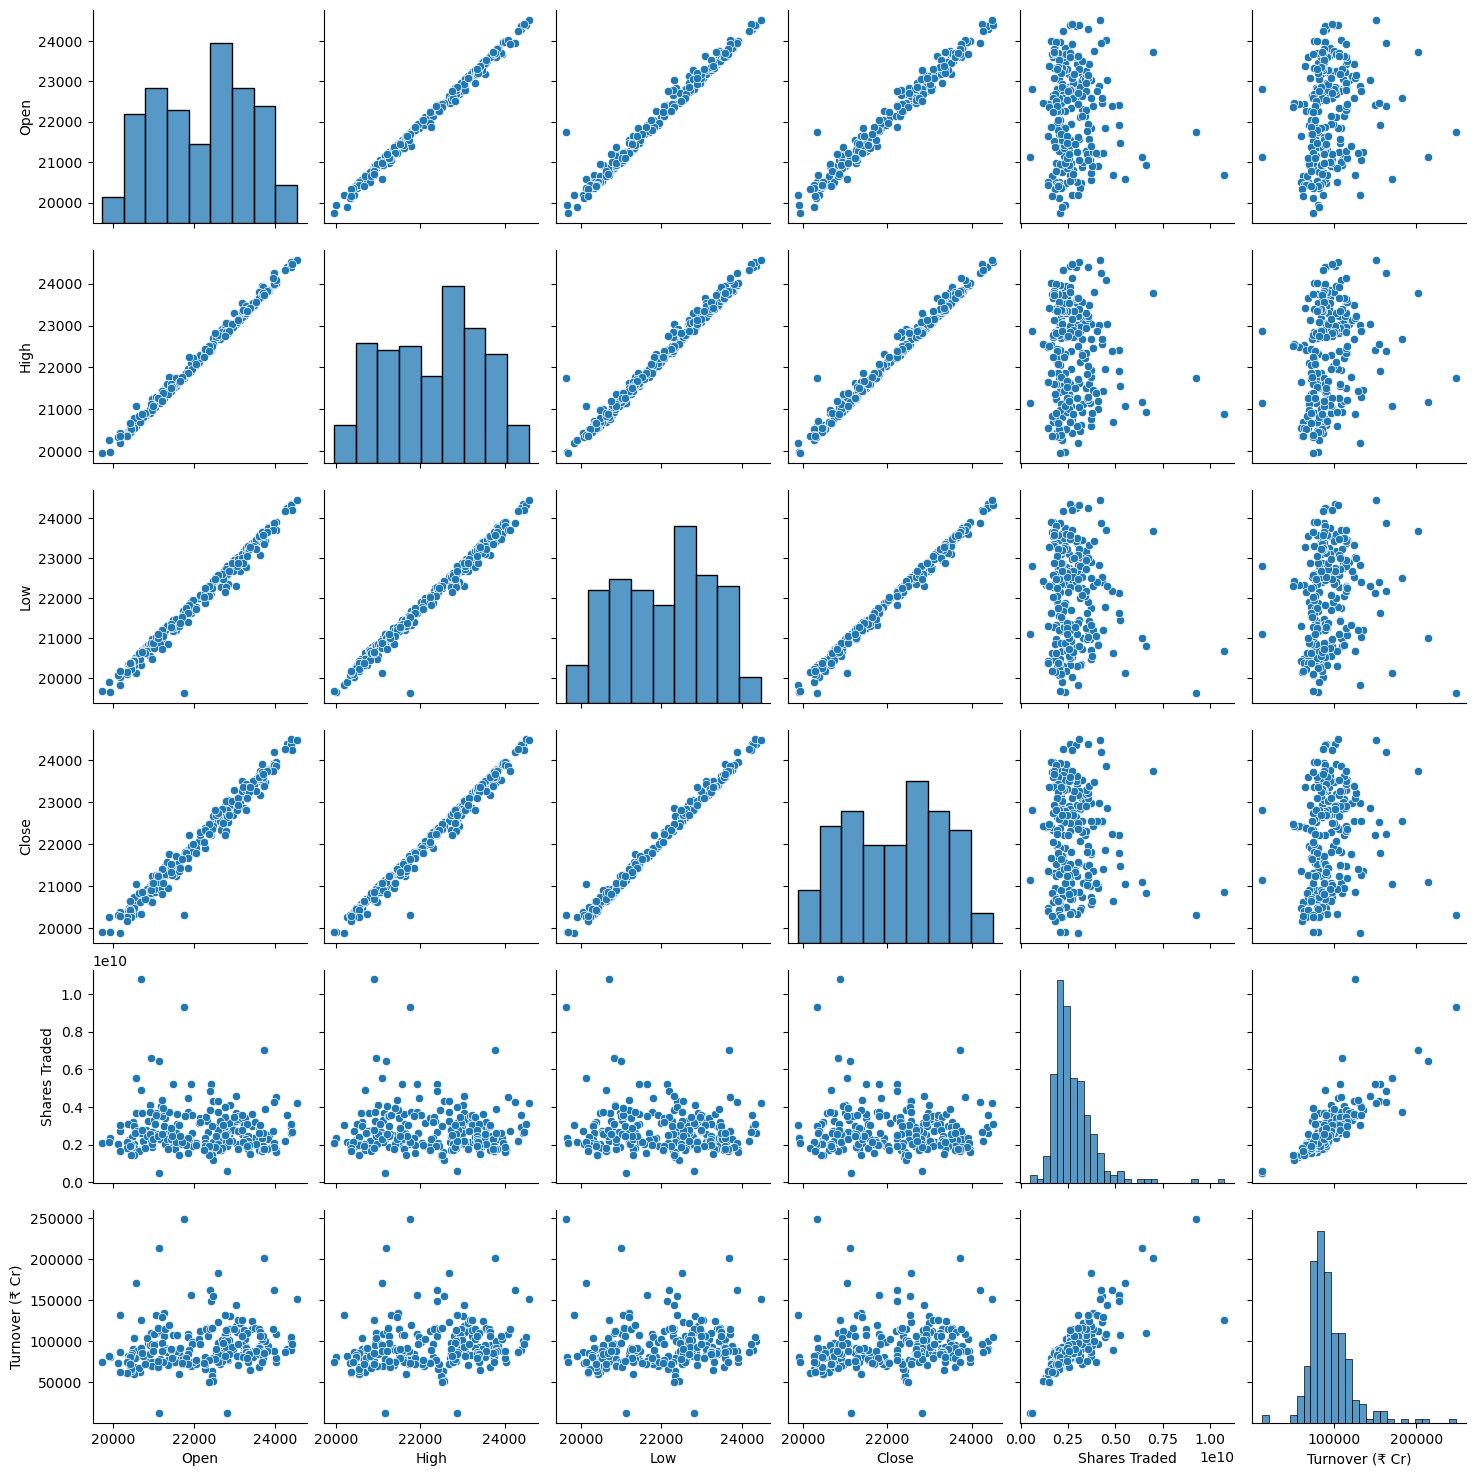

In [101]:
sns.pairplot(df)
plt.show()

In [15]:
x = df[["Open","High","Low","Close","Shares Traded","Turnover (₹ Cr)"]].corr()
x

NameError: name 'df' is not defined

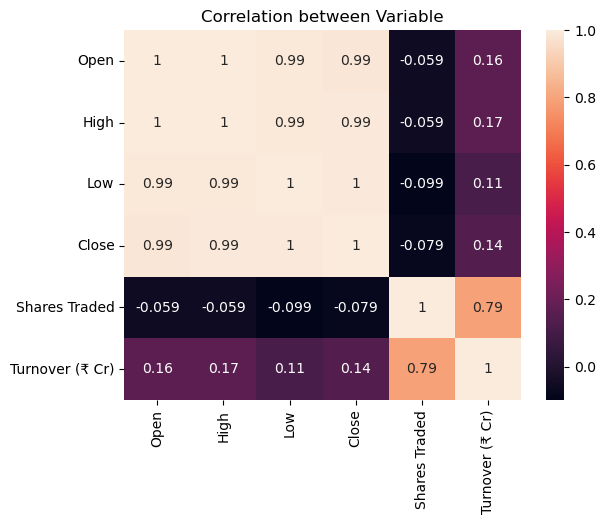

In [109]:
sns.heatmap(x, annot=True)
plt.title("Correlation between Variable")
plt.show()

In [113]:
#Data split
x = df[["Open","High","Low"]]
y = df["Close"]


In [115]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state=2)

In [119]:
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(198, 3) (50, 3) (198,) (50,)


In [163]:
Y_test

186    22341.65
90     23280.35
165    23312.10
166    23292.00
91     23368.65
217    20611.40
216    20652.35
30     21489.55
35     21038.55
74     23292.05
10     20730.65
66     23209.85
144    22679.85
160    22687.00
133    23263.25
3      20745.50
71     22865.20
135    22841.10
221    20468.45
154    21820.85
111    23898.65
155    22225.55
239    21538.10
24     20741.85
232    20264.35
182    22481.80
53     22436.80
101    23748.90
20     20344.80
188    22046.55
13     20992.20
134    22814.45
41     21764.15
222    20418.75
122    23534.95
226    19917.85
215    20633.10
23     20683.80
157    22562.45
142    22823.55
14     20997.20
173    22934.40
65     23095.45
141    22689.35
126    23598.15
192    21551.20
172    23095.75
25     20929.05
164    23277.95
236    20864.50
Name: Close, dtype: float64

In [5]:
#Model Selection 
from sklearn.linear_model import LinearRegression


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.2.4 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "C:\Users\shiva\OneDrive\Documents\New folder\Lib\site-packages\ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "C:\Users\shiva\OneDrive\Documents\New folder\Lib\site-packages\traitlets\config\application.py", line 1075, in launch_instance
    app.start()
  File "C:\Users\shiva\OneDrive\Documents\New folder\Lib\site-packages\ipykernel\kernelapp.py", line 701, in start
    self.io

ImportError: 
A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.2.4 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.



ImportError: numpy.core.multiarray failed to import

In [4]:
lr = LinearRegression()

NameError: name 'LinearRegression' is not defined

In [129]:
lr.fit(X_train, Y_train)

LinearRegression()

In [151]:
y_pred = lr.predict(X_test)

In [159]:
#Model Efficiency
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [161]:
print("Mean Aboslute Error", mean_absolute_error(y_pred, Y_test))
print("Mean Squared Error", mean_squared_error(y_pred, Y_test))
print("R2", r2_score(y_pred, Y_test))

Mean Aboslute Error 54.11897015884606
Mean Squared Error 6334.607684786405
R2 0.9952675415686595


In [3]:
lr.fit(X_test, Y_test)

NameError: name 'lr' is not defined